<a href="https://colab.research.google.com/github/cahcharm/Neuro-and-Complexity-Science/blob/CSHA2021/tutorials/Computational%20Neuroscience/decision_making/exercise/0_signal_detection_theory/signal_detection_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction 

Signal detection theory is a means to quantify the ability to differentiate between valid information (signal) and noise. This is done by defining a boundary (or threshold) that separates signal from noise. When the threshold is set very low noise might inadvertently be classified as signal (i.e. many false positives (FP)). Vice versa, when the threshold is set very high signal might be classied as noise (many false negatives, FN)). Systematically varying the threshold provides a global view on how discriminable signal and noise are.

![title](fig/roc.png)

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

## Prerequisites

- $d' = (\mu_S - \mu_N) / \sigma$ quantifies how far two normal distributions with means $\mu_S$ and $\mu_N$ and common standard deviation $\sigma$ are apart
- ROC analysis
- basic Python skills

## Objectives

- practice ROC analysis on mock data
- use random distributions in Python
- visualize data in Python
- beautify figures in Python

# Notebook setup

** Instructions **
- Import numpy, scipy, and matplotlib
- configure inline plots

In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

As you go along, return here and add any additional module that is needed

# Problem 1: Normal distributions

** Instructions **
- Draw 10000 samples each from 2 normal distributions (hint: np.random.normal) with different means and standard deviations
- Plot histograms of the two distributions in one plot (hint: plt.hist; experiment with parameters bins, normed, histtype, color, alpha, linewidth, label)
- Also plot the probability density function of the two distributions in the same plot
- Add a legend to the plot (hint: plt.legend; if necessary consider the parameter 'loc')
- Add a vertical line representing the decision criterion (hint: plt.axvline)

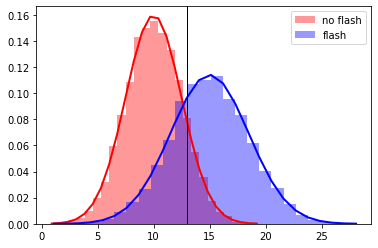

In [8]:
mu1, s1 = 10, 2.5
mu2, s2 = 15, 3.5

y1 = np.random.normal(mu1, s1, size=10000) # no flash
y2 = np.random.normal(mu2, s2, size=10000) # flash

pdf, bins, patches = plt.hist(y1, bins=25, density = True, 
                          histtype='stepfilled', color='r',
                          alpha=0.4, linewidth=0, label='no flash')

plt.plot(bins, sp.stats.norm.pdf(bins, mu1, s1), color = 'r', linewidth=2)

#Plot y2
pdf, bins, patches = plt.hist(y2, bins=25, density = True, 
                          histtype='stepfilled', color='b',
                          alpha=0.4, linewidth=0, label='flash')

plt.plot(bins, sp.stats.norm.pdf(bins, mu2, s2), color = 'b', linewidth=2)

plt.axvline(13, color='black', linewidth=1)

plt.legend()

# Problem 2: ROC analysis 

** Instructions **
- Draw samples from a normal distribution with mean 10 and std 2.5
- Draw samples from another normal distribution with std 2.5
- Vary the mean of the second distribution from 11 to 19 in steps of 2
- For each value of the second mean calculate an ROC curve (i.e. true positive rate vs. false positive rate, for a varying decision criterion) and plot all ROC curves in the same plot as dots
- For each value of the second mean also calculate the ROC curve based on the normal pdf (instead of: samples from the pdf) and plot as lines. (hint: scipy.stats.norm.cdf, scipy.stats.norm.sf)
- For each value of the second mean calculate d'
- add axes labels, title and a legend to the plot
- How does the plot change depending on the number of samples drawn from the distributions? Also consider a different number of noise and signal samples.

** Possibly helpful numpy functions **
- np.min, np.max, np.linspace, np.arange, np.zeros, np.zeros_like, np.mean

In [9]:
from sklearn.metrics import roc_auc_score

mu1, s = 10, 2.5

n = 100
def pltROCs(mu1, s, n_signal, n_noise):
    for mu2 in range(mu1 + 1, 2 * mu1, 2):

        dPrime = (mu2 - mu1) / np.sqrt(.5 * (s+s))

        no_flash = np.random.normal(mu1, s, size=n_noise) # no flash
        flash = np.random.normal(mu2, s, size=n_signal)    # flash

        data_min = np.min([no_flash.min(), flash.min()])
        data_max = np.max([no_flash.max(), flash.max()])

        # decision criterion z
        z_range = np.linspace(data_min, data_max, num=50)

        falsePositiveRate_samples = np.zeros_like(z_range)
        truePositiveRate_samples = np.zeros_like(z_range)

        falsePositiveRate_distr = np.zeros_like(z_range)
        truePositiveRate_distr = np.zeros_like(z_range)

        for idx, z in enumerate(z_range):

            falsePositiveRate_samples[idx] = np.mean(no_flash >= z)
            truePositiveRate_samples[idx] = np.mean(flash >= z)

            falsePositiveRate_distr[idx] = sp.stats.norm.sf(z, loc=mu1, scale=s)
            truePositiveRate_distr[idx] = sp.stats.norm.sf(z, loc=mu2, scale=s) 

        auc = roc_auc_score([True]*n_signal + [False]*n_noise, 
                            np.hstack([flash, no_flash]))
        
            
        plt.plot(falsePositiveRate_distr, truePositiveRate_distr, '-', color='black', linewidth=1)
        plt.plot(falsePositiveRate_samples, truePositiveRate_samples, '.', 
                 label="$\mu_2=%s, d'=%.1f$, auc=%.2f" % (str(mu2), dPrime, auc))

    plt.legend(loc='lower right')
    plt.xlim(0,1,)
    plt.ylim(0,1)
    plt.title('ROC curves')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

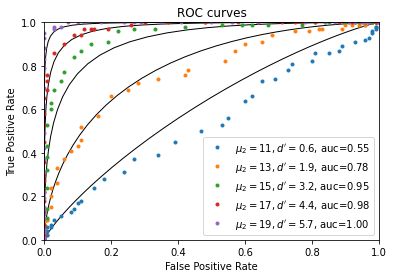

In [10]:
pltROCs(10, 2.5, 100, 100)

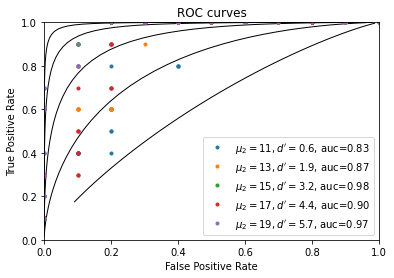

In [11]:
pltROCs(10, 2.5, 10, 10)

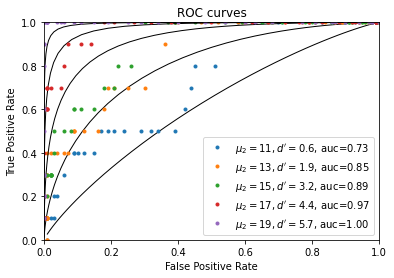

In [15]:
pltROCs(10, 2.5, 10, 100)